# ML Assignment - LitCovid

## Load Data

In [1]:
import pandas as pd
import numpy as np

In [23]:
train_set = pd.read_csv("data/LitCovid.train.csv", sep=',')
test_set = pd.read_csv("data/LitCovid.test.csv", sep=',')
dev_set = pd.read_csv("data/LitCovid.dev.csv", sep=',')

data = pd.concat([train_set, test_set, dev_set], ignore_index=True)
data

,Unnamed: 0,pmid,title,text,clean_doc,clean_doc_tokenized,human_label,label
0,0,32574291,The Battle Against COVID-19 in Jordan: An Earl...,The Battle Against COVID-19 in Jordan: An Earl...,the battle against covid-19 in jordan : an ear...,"[['the', 'battle', 'against', 'covid-19', 'in'...",prevention,1000
1,1,32409107,Resumption of activity in gastroenterology dep...,Restablecimiento de la actividad en los servic...,restablecimiento de la actividad en los servic...,"[['restablecimiento', 'de', 'la', 'actividad',...",prevention,1000
2,2,32432804,Impact of severe acute respiratory syndrome on...,Impact of Severe Acute Respiratory Syndrome (S...,impact of severe acute respiratory syndrome ( ...,"[['impact', 'of', 'severe', 'acute', 'respirat...",prevention,1000
3,3,32637365,Participation of the IL-10RB Related Cytokines...,Participation of the IL-10RB Related Cytokines...,participation of the il-10rb related cytokines...,"[['participation', 'of', 'the', 'il-10rb', 're...","treatment, mechanism",1100000
4,4,32061198,[Inhibitors of RAS Might Be a Good Choice for ...,[Inhibitors of RAS Might Be a Good Choice for ...,[ inhibitors of ras might be a good choice for...,"[['[', 'inhibitors', 'of', 'ras', 'might', 'be...","treatment, mechanism",1100000
...,...,...,...,...,...,...,...,...
23033,10205,32367847,Nasopharyngeal wash in preventing and treating...,Nasopharyngeal wash in preventing and treating...,nasopharyngeal wash in preventing and treating...,"[['nasopharyngeal', 'wash', 'in', 'preventing'...","treatment, prevention",1001000
23034,10206,32615866,"C-reactive protein, procalcitonin, D-dimer, an...","C-reactive protein, procalcitonin, D-dimer, an...","c-reactive protein , procalcitonin , d-dimer ,...","[['c-reactive', 'protein', ',', 'procalcitonin...","diagnosis, treatment",11000000
23035,10207,32459672,Routine Venous Thromboembolism Prophylaxis May...,Routine Venous Thromboembolism Prophylaxis May...,routine venous thromboembolism prophylaxis may...,"[['routine', 'venous', 'thromboembolism', 'pro...","diagnosis, treatment",11000000
23036,10208,32686633,QT interval evaluation associated with the use...,QT interval evaluation associated with the use...,qt interval evaluation associated with the use...,"[['qt', 'interval', 'evaluation', 'associated'...","diagnosis, treatment",11000000


In [24]:
data.describe(include = 'object')

,title,text,clean_doc,clean_doc_tokenized,human_label
count,23034,23038,23038,23038,23038
unique,22938,23013,23006,23006,54
top,CORONA-steps for tracheotomy in COVID-19 patie...,Novel coronavirus disease (COVID-19) outbreak:...,[ pulmonary rehabilitation guidelines in the p...,"[['impact', 'of', 'the', 'covid-19', 'pandemic...",prevention
freq,4,2,2,2,9327


## Exploring

In [15]:
data.human_label.unique()

array(['prevention', 'treatment, mechanism', 'transmission, prevention',
       'case_report', 'mechanism', 'general', 'diagnosis, treatment',
       'diagnosis', 'transmission', 'treatment', 'treatment, prevention',
       'mechanism, transmission',
       'diagnosis, treatment, mechanism, transmission, prevention',
       'diagnosis, prevention', 'diagnosis, transmission',
       'diagnosis, treatment, prevention',
       'diagnosis, transmission, prevention', 'diagnosis, mechanism',
       'mechanism, transmission, prevention',
       'diagnosis, treatment, mechanism', 'prevention, forecasting',
       'treatment, transmission, prevention',
       'treatment, mechanism, prevention', 'forecasting',
       'diagnosis, treatment, mechanism, prevention',
       'diagnosis, forecasting', 'mechanism, prevention',
       'diagnosis, treatment, transmission, prevention',
       'transmission, forecasting', 'diagnosis, mechanism, prevention',
       'diagnosis, mechanism, transmission',
    

In [16]:
# One-hot encoding
onehot = (data.human_label.str.split(r'\s*,\s*', expand=True)
   .apply(pd.Series.value_counts, 1)
   .iloc[:, 0:]
   .fillna(0, downcast='infer'))

In [17]:
onehot.sum()

case_report      1914
diagnosis        4754
forecasting       461
general           368
mechanism        3549
prevention      11042
transmission     1065
treatment        6897
dtype: int64

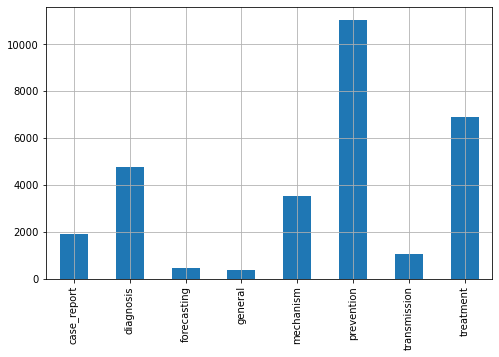

In [18]:
onehot.sum().plot(kind='bar', legend=False, grid=True, figsize=(8, 5))

In [19]:
onehot.sum(axis=1).value_counts()

1    16946
2     5324
3      636
4      112
5       20
dtype: int64

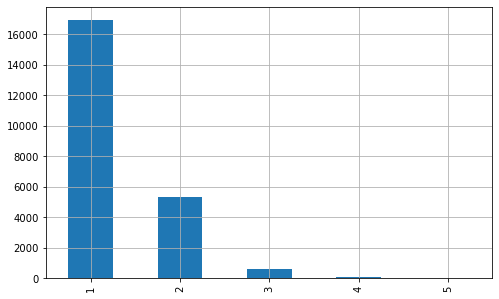

In [20]:
onehot.sum(axis=1).value_counts().plot(kind='bar', legend=False, grid=True, figsize=(8, 5))

In [21]:
lens = data.text.str.len()
lens.describe()

count     23038.000000
mean       9598.053173
std       13640.951549
min         171.000000
25%        1353.000000
50%        2902.500000
75%       12530.250000
max      166027.000000
Name: text, dtype: float64

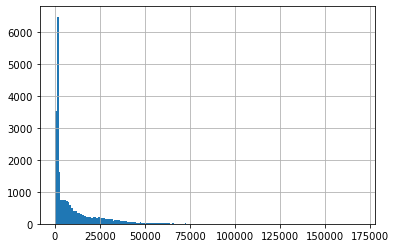

In [22]:
lens.hist(bins = np.arange(0,170000,1000))

## Preprocess

In [25]:
data = pd.concat([data, onehot], axis=1)
data = data.drop(['Unnamed: 0', 'pmid', 'clean_doc', 'clean_doc_tokenized', 'label', 'human_label'], axis=1)
data

,title,text,case_report,diagnosis,forecasting,general,mechanism,prevention,transmission,treatment
0,The Battle Against COVID-19 in Jordan: An Earl...,The Battle Against COVID-19 in Jordan: An Earl...,0,0,0,0,0,1,0,0
1,Resumption of activity in gastroenterology dep...,Restablecimiento de la actividad en los servic...,0,0,0,0,0,1,0,0
2,Impact of severe acute respiratory syndrome on...,Impact of Severe Acute Respiratory Syndrome (S...,0,0,0,0,0,1,0,0
3,Participation of the IL-10RB Related Cytokines...,Participation of the IL-10RB Related Cytokines...,0,0,0,0,1,0,0,1
4,[Inhibitors of RAS Might Be a Good Choice for ...,[Inhibitors of RAS Might Be a Good Choice for ...,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
23033,Nasopharyngeal wash in preventing and treating...,Nasopharyngeal wash in preventing and treating...,0,0,0,0,0,1,0,1
23034,"C-reactive protein, procalcitonin, D-dimer, an...","C-reactive protein, procalcitonin, D-dimer, an...",0,1,0,0,0,0,0,1
23035,Routine Venous Thromboembolism Prophylaxis May...,Routine Venous Thromboembolism Prophylaxis May...,0,1,0,0,0,0,0,1
23036,QT interval evaluation associated with the use...,QT interval evaluation associated with the use...,0,1,0,0,0,0,0,1


In [26]:
import nltk

# tokenize
data['title'] = data['title'].astype(str)
data['processed_title'] = [nltk.word_tokenize(title.upper()) for title in data['title']]
[w for w in data['processed_title'][0]]

['THE',
 'BATTLE',
 'AGAINST',
 'COVID-19',
 'IN',
 'JORDAN',
 ':',
 'AN',
 'EARLY',
 'OVERVIEW',
 'OF',
 'THE',
 'JORDANIAN',
 'EXPERIENCE',
 '.']

In [27]:
# exclude non-alphanumeric
data['processed_title'] = [[token for token in tokens if token.isalnum()] for tokens in data.processed_title]
[w for w in data['processed_title'][0]]

['THE',
 'BATTLE',
 'AGAINST',
 'IN',
 'JORDAN',
 'AN',
 'EARLY',
 'OVERVIEW',
 'OF',
 'THE',
 'JORDANIAN',
 'EXPERIENCE']

In [28]:
# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
data['processed_title'] = [[token for token in tokens if token.lower() not in stopwords] for tokens in data.processed_title]
[w for w in data['processed_title'][0]]

['BATTLE', 'JORDAN', 'EARLY', 'OVERVIEW', 'JORDANIAN', 'EXPERIENCE']

## Extract Features

In [29]:
all_title_words = sum(data['processed_title'], [])
all_title_words[:25]

['BATTLE',
 'JORDAN',
 'EARLY',
 'OVERVIEW',
 'JORDANIAN',
 'EXPERIENCE',
 'RESUMPTION',
 'ACTIVITY',
 'GASTROENTEROLOGY',
 'DEPARTMENTS',
 'RECOMMENDATIONS',
 'SEPD',
 'AEEH',
 'GETECCU',
 'AEG',
 'IMPACT',
 'SEVERE',
 'ACUTE',
 'RESPIRATORY',
 'SYNDROME',
 'BLOOD',
 'SERVICES',
 'BLOOD',
 'HONG',
 'KONG']

In [30]:
# Get most common words
freq_dist = nltk.FreqDist(all_title_words)
word_features = list(freq_dist)[:2000]
freq_dist.most_common(20)

[('PANDEMIC', 4028),
 ('CORONAVIRUS', 3666),
 ('PATIENTS', 3503),
 ('DISEASE', 2667),
 ('2019', 1948),
 ('INFECTION', 1757),
 ('CLINICAL', 1491),
 ('CARE', 1226),
 ('NOVEL', 1104),
 ('REVIEW', 1069),
 ('MANAGEMENT', 1042),
 ('STUDY', 1017),
 ('OUTBREAK', 985),
 ('TREATMENT', 972),
 ('HEALTH', 956),
 ('SEVERE', 922),
 ('ACUTE', 873),
 ('CHINA', 841),
 ('RESPIRATORY', 804),
 ('CASE', 789)]

In [31]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)    
X = tfidf.fit_transform(data.processed_title)

X.shape

(23038, 13758)

In [ ]:
# Bag of Words
# Word2Vec

## Model

In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, data[onehot.columns], test_size=0.25, random_state=42)

algos = {
    'Linear SVC': LinearSVC(random_state=0),
    'Naive Bayes': MultinomialNB(fit_prior=True, class_prior=None),
    'Logistic Regression': LogisticRegression(solver='sag'),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
#     "MLPClassifier": MLPClassifier(max_iter=1000),
#     "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
};

for algo in algos:
    print('ALGOTIRHM: {}'.format(algo))
    
    model = OneVsRestClassifier(algos[algo]).fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    f1 = f1_score(y_test, prediction, average = 'micro')
    
    print('Test accuracy is {}'.format(accuracy))
    print('F1 Score is {}'.format(f1))
    print()


# for algo in algos:
#     print('ALGORITHM: {}'.format(algo))
#     for category in onehot.columns:
#         y_train = data2[category][:train_size]
#         y_test = data2[category][train_size:train_size+test_size]

#         model = OneVsRestClassifier(algos[algo]).fit(X_train, y_train)
#         prediction = model.predict(X_test)

#         print('... Processing {}'.format(category))
#         print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))
#         print('F1 Score is {}'.format(f1_score(y_test, prediction, average='micro')))
#     print()

ALGOTIRHM: Linear SVC
Test accuracy is 0.6178819444444444
F1 Score is 0.7610759493670886

ALGOTIRHM: Naive Bayes
Test accuracy is 0.5420138888888889
F1 Score is 0.6792854801704359

ALGOTIRHM: Logistic Regression
Test accuracy is 0.6001736111111111
F1 Score is 0.7406950759035217

ALGOTIRHM: RandomForestClassifier
Test accuracy is 0.5921875
F1 Score is 0.7349615558570782

ALGOTIRHM: AdaBoostClassifier
Test accuracy is 0.4782986111111111
F1 Score is 0.6536366549182954

ALGOTIRHM: DecisionTreeClassifier
Test accuracy is 0.45677083333333335
F1 Score is 0.6669378898833741

